# Bank Marketing Campaign

In [1]:
# Import Libraries
import pandas as pd  # For data manupulation using dataframes
import numpy as np   # For Statistical Analysis

In [2]:
d= pd.read_csv("bank-full.csv")

In [3]:
d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# no of rows and columns
d.shape

(45211, 17)

In [5]:
# Datatypes of columns and non-null values
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

In [7]:
# display numeric and categorical features
def display_numeric_categoric_feature(dataset):
    numeric_columns = numeric_features(dataset)
    print("Numeric Features:")
    print(numeric_columns)
    print("===="*20)
    categorical_columns = categorical_features(dataset)
    print("Categorical Features:")
    print(categorical_columns)

In [8]:
display_numeric_categoric_feature(d)

Numeric Features:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [9]:
# total null values in the dataset
d.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no null record in the data.

In [10]:
# Description of numerical columns
d.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# list of columns 
d.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Exploratory Data Analysis

In [12]:
# Remove duplicate rows
d=d.drop_duplicates()
d

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
# The duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
#Thus, this input should be discarded for a realistic predictive model.
d= d.drop(['duration'], axis=1)

In [14]:
d.shape

(45211, 16)

In [15]:
# change datatype of categorical columns into "category"
d["job"]=d["job"].astype("category")
d["marital"]=d["marital"].astype("category")
d["education"]=d["education"].astype("category")
d["default"]=d["default"].astype("category")
d["housing"]=d["housing"].astype("category")
d["loan"]=d["loan"].astype("category")
d["contact"]=d["contact"].astype("category")
d["month"]=d["month"].astype("category")
d["poutcome"]=d["poutcome"].astype("category")
d["y"]=d["y"].astype("category")


In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  poutcome   45211 non-null  category
 15  y          45211 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.8 MB


In [17]:
# Number of counts of categorical features
d['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [18]:
# Number of counts of categorical features
d['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
# Number of counts of categorical features
d['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [20]:
# Number of counts of categorical features
d['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [21]:
# Number of counts of categorical features
d['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [22]:
# Number of counts of categorical features
d['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [23]:
# Number of counts of categorical features
d['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [24]:
# Number of counts of categorical features
d['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [25]:
# Number of counts of categorical features
d['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [26]:
# Number of counts of Target variable
d['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Visualisation and Pre-processing

In [27]:
import matplotlib.pyplot as plt       # For Data Visualisation
import seaborn as sns                 # for statistical Data Visualisation
import warnings
warnings.filterwarnings('ignore')

# Univariate Analysis

In [28]:
# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

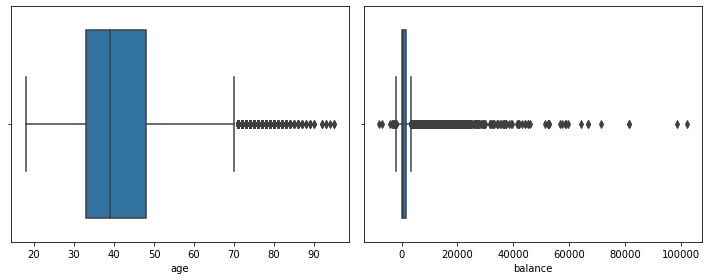

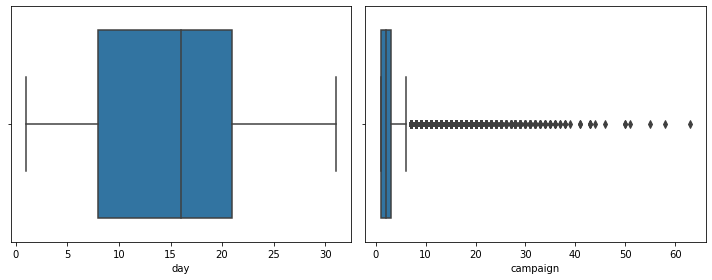

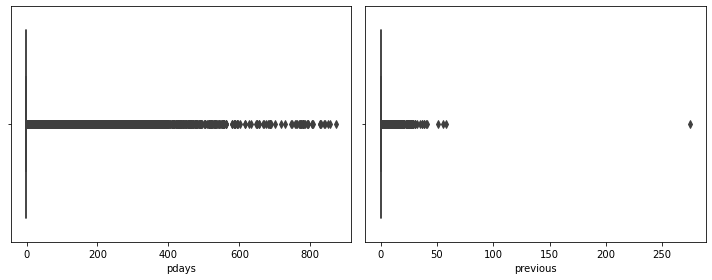

In [29]:
plot_box_plots(d)

In [30]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

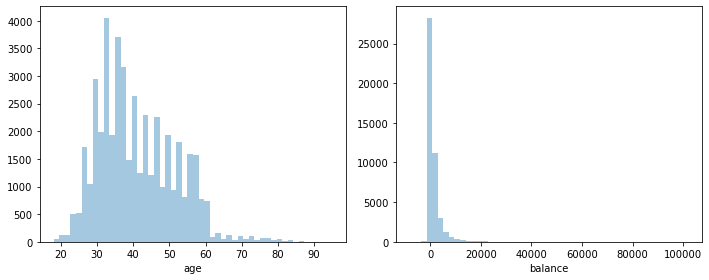

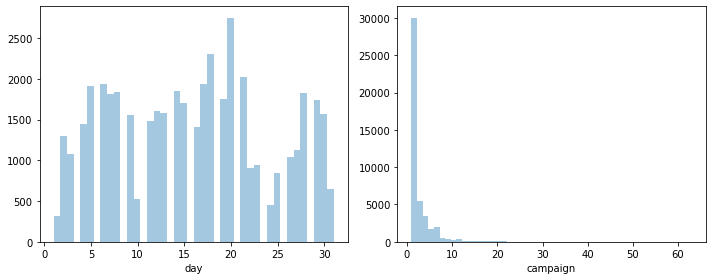

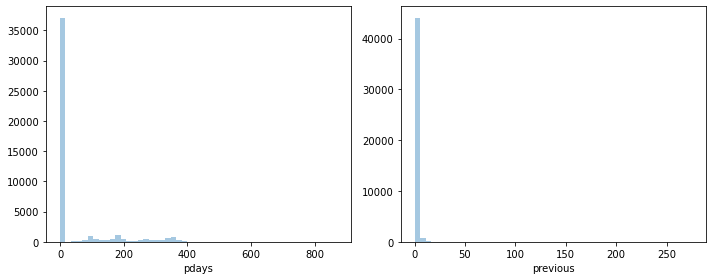

In [31]:
plot_continuous_columns(d)

In [32]:
# Encoding target variable to check correlation between target and input variables
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

d['y']=le.fit_transform(d['y'])

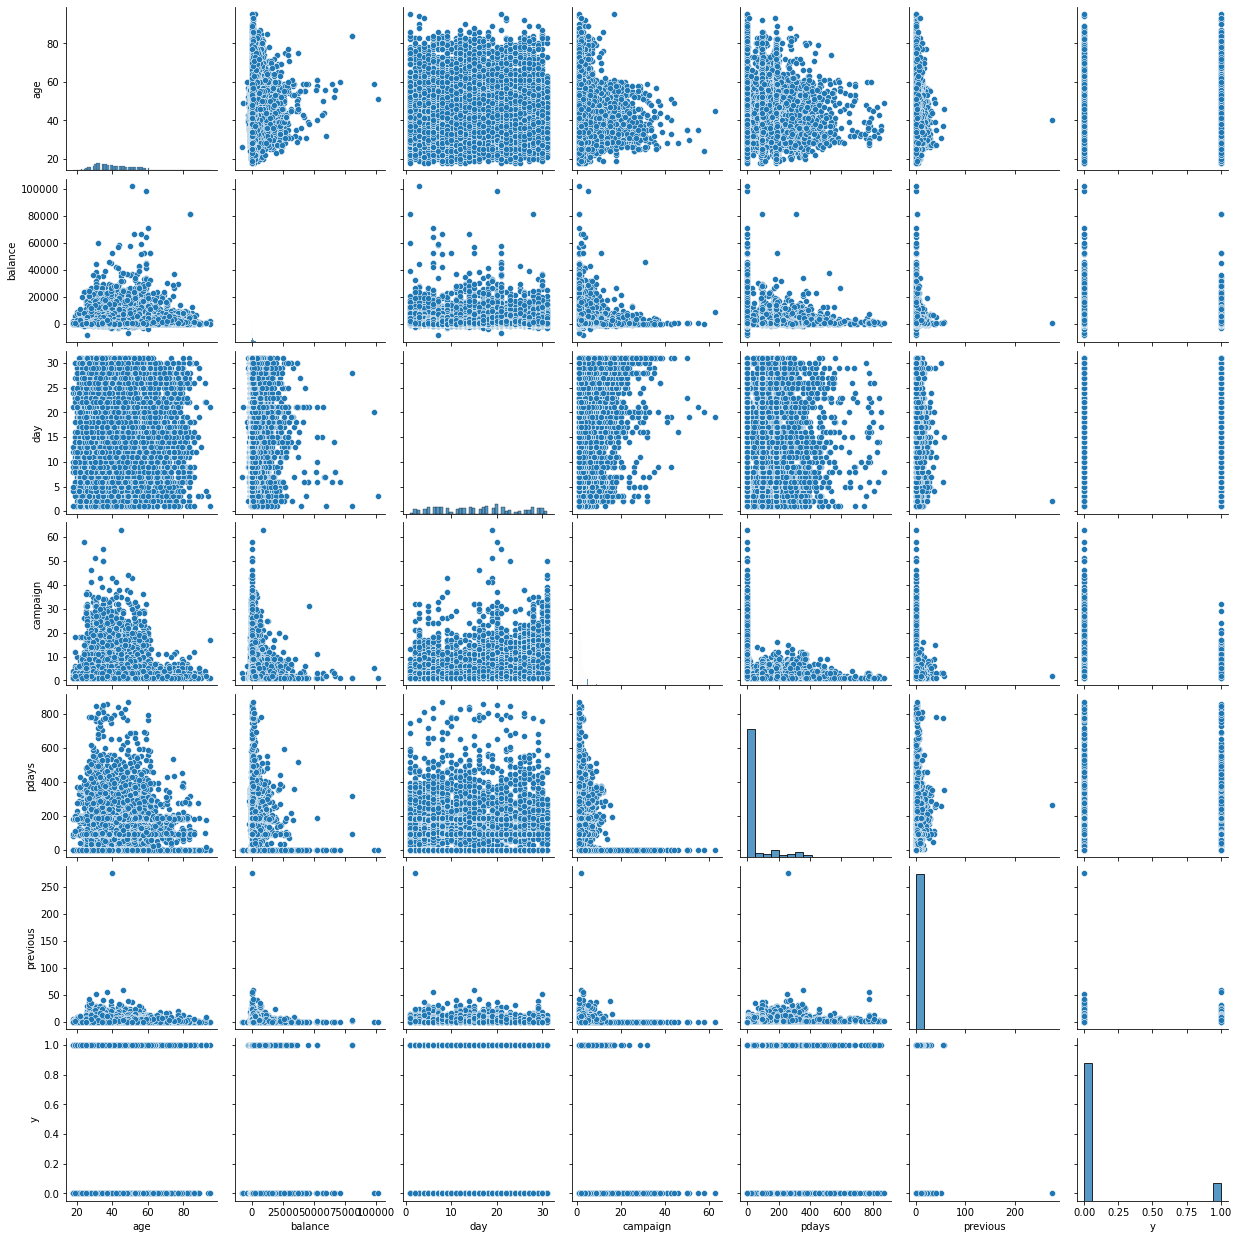

In [33]:
sns.pairplot(d) # checking the relationship 

There is no strong correlation between target variable and input variables.

In [35]:
d.corr()

,age,balance,day,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710,-0.028348
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,-0.073172,0.103621,0.093236,1.000000


<AxesSubplot:>

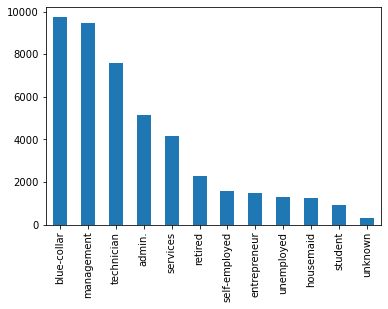

In [36]:
# Categorical columns
d['job'].value_counts().plot.bar()

<AxesSubplot:>

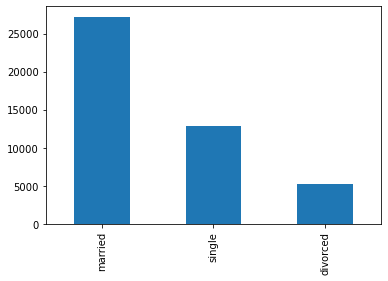

In [37]:
d['marital'].value_counts().plot.bar()

<AxesSubplot:>

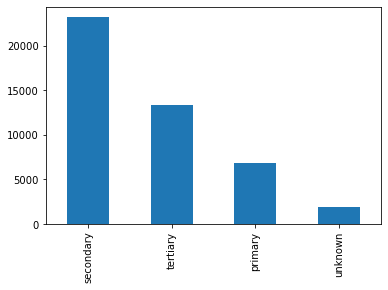

In [38]:
d['education'].value_counts().plot.bar()

<AxesSubplot:>

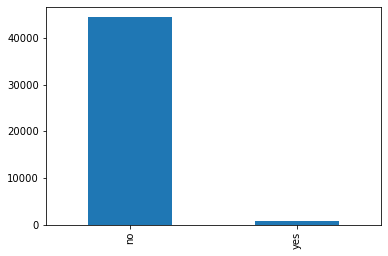

In [39]:
d['default'].value_counts().plot.bar()

<AxesSubplot:>

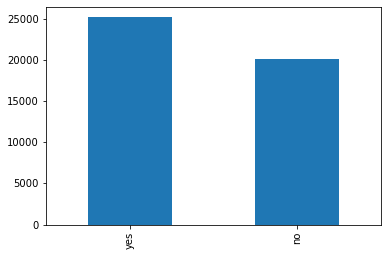

In [40]:
d['housing'].value_counts().plot.bar()

<AxesSubplot:>

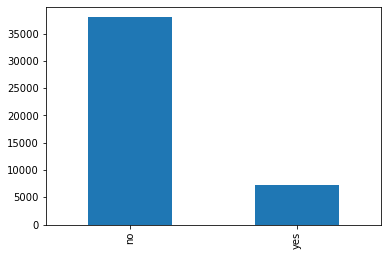

In [41]:
d['loan'].value_counts().plot.bar()

<AxesSubplot:>

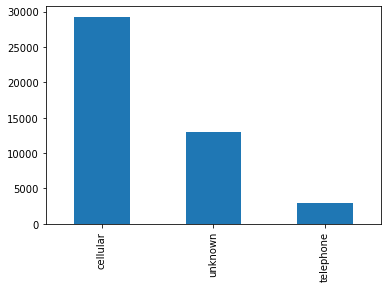

In [42]:
d['contact'].value_counts().plot.bar()

<AxesSubplot:>

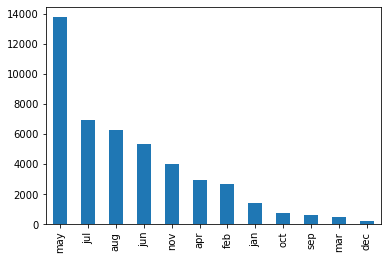

In [43]:
d['month'].value_counts().plot.bar()

<AxesSubplot:>

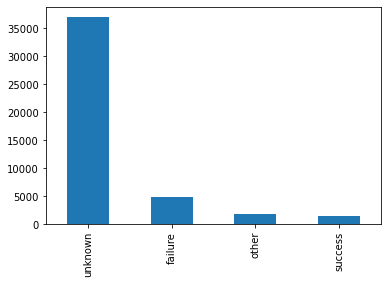

In [44]:
d['poutcome'].value_counts().plot.bar()

<AxesSubplot:>

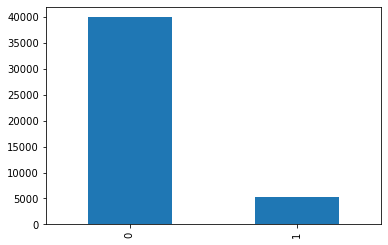

In [45]:
d['y'].value_counts().plot.bar()

# Bivariate Analysis

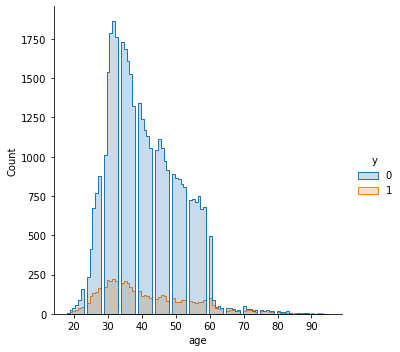

In [46]:
sns.displot(d, x="age", hue="y", element="step")

Here we see peolpe between age 30-40 are main contributor towards deposit subscription

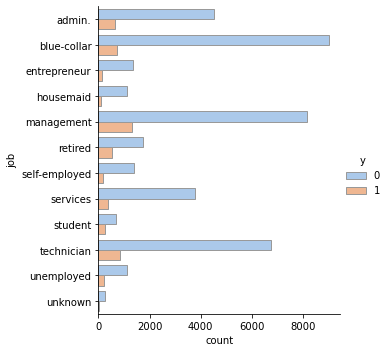

In [47]:
sns.catplot(
    data=d, y="job", hue="y", kind="count",
    palette="pastel", edgecolor=".6",)

Here we see people with job related to 'management, blue-collar and technician' have subscribed for deposit 

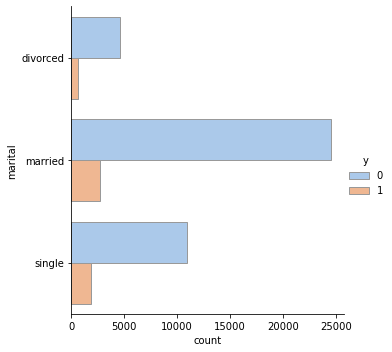

In [48]:
sns.catplot(
    data=d, y="marital", hue="y", kind="count",
    palette="pastel", edgecolor=".6",)

Married people are main contributor for deposit scheme

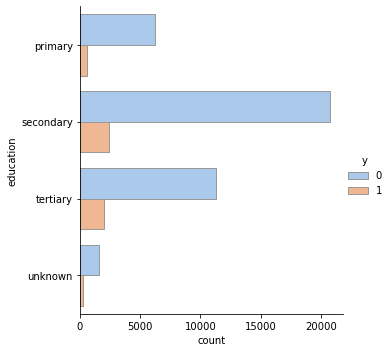

In [49]:
sns.catplot(
    data=d, y="education", hue="y", kind="count",
    palette="pastel", edgecolor=".6",)

People with secondary and tertiary educational background are main contributors.

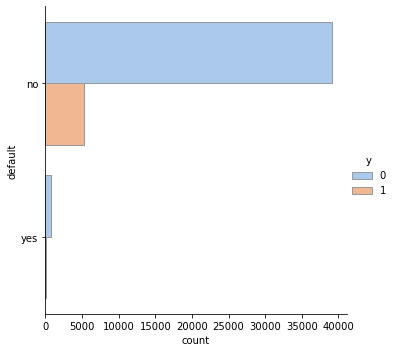

In [50]:
sns.catplot(
    data=d, y="default", hue="y", kind="count",
    palette="pastel", edgecolor=".6",)

People with good credit history are main contributors.

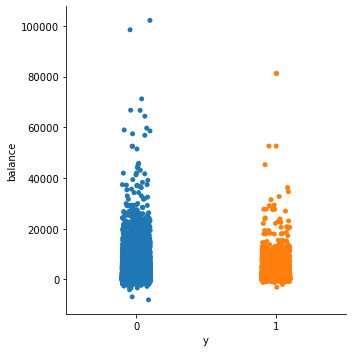

In [51]:
sns.catplot(data=d, x="y", y="balance")

People with balance around 20,000 are main contributors

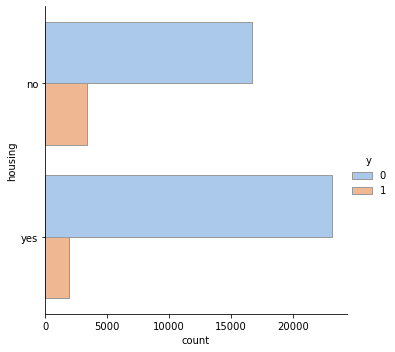

In [52]:
sns.catplot(
    data=d, y="housing", hue="y", kind="count",
    palette="pastel", edgecolor=".6",)

most of the People with no housing scheme have subcribed for the deposit.

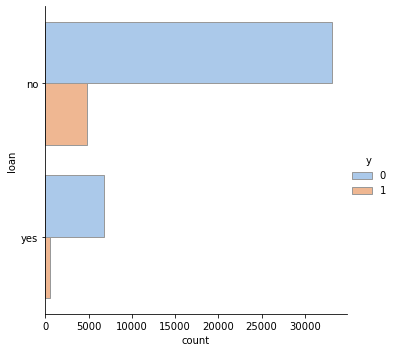

In [53]:
sns.catplot(
    data=d, y="loan", hue="y", kind="count",
    palette="pastel", edgecolor=".6",)

Those who have no personal loan have subscribed for the deposit.

<AxesSubplot:>

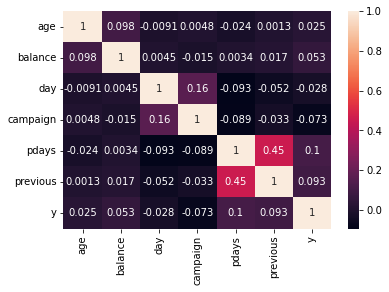

In [54]:
sns.heatmap(d.corr(),annot=True)

# Encoding

In [55]:
from sklearn import preprocessing

In [56]:
le=preprocessing.LabelEncoder()
d['job']=le.fit_transform(d['job'])
d['marital']=le.fit_transform(d['marital'])
d['education']=le.fit_transform(d['education'])
d['default']=le.fit_transform(d['default'])
d['housing']=le.fit_transform(d['housing'])
d['loan']=le.fit_transform(d['loan'])
d['contact']=le.fit_transform(d['contact'])
d['month']=le.fit_transform(d['month'])
d['poutcome']=le.fit_transform(d['poutcome'])

In [57]:
d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3,0


number of category counts in categorical column after encoding

In [58]:
d['job'].value_counts()

1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: job, dtype: int64

In [59]:
d['marital'].value_counts()

1    27214
2    12790
0     5207
Name: marital, dtype: int64

In [60]:
d['education'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

In [61]:
d['default'].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [62]:
d['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [63]:
d['loan'].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [64]:
d['contact'].value_counts()

0    29285
2    13020
1     2906
Name: contact, dtype: int64

In [65]:
d['month'].value_counts()

8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: month, dtype: int64

In [66]:
d['poutcome'].value_counts()

3    36959
0     4901
1     1840
2     1511
Name: poutcome, dtype: int64

# Normalization

In [67]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [68]:
d1=d.iloc[:,:-1]
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,4,-1,0,3


In [69]:
array=d1.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array)

set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.52 0.36 0.5  0.67 0.   0.09 1.   0.   1.   0.13 0.73 0.   0.   0.
  1.  ]
 [0.34 0.82 1.   0.33 0.   0.07 1.   0.   1.   0.13 0.73 0.   0.   0.
  1.  ]
 [0.19 0.18 0.5  0.33 0.   0.07 1.   1.   1.   0.13 0.73 0.   0.   0.
  1.  ]
 [0.38 0.09 0.5  1.   0.   0.09 1.   0.   1.   0.13 0.73 0.   0.   0.
  1.  ]
 [0.19 1.   1.   1.   0.   0.07 0.   0.   1.   0.13 0.73 0.   0.   0.
  1.  ]]


In [70]:
d2=pd.DataFrame(rescaledX,columns=["age","job","marital","education","default","balance","housing","loan","contact","day",
                                   "month","campaign","pdays","previous","poutcome"])
d2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.000000,0.000000,0.000000,1.000000
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.000000,0.000000,0.000000,1.000000
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.000000,0.000000,0.000000,1.000000
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.000000,0.000000,0.000000,1.000000
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.032258,0.000000,0.000000,1.000000
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.016129,0.000000,0.000000,1.000000
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.064516,0.212156,0.010909,0.666667
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.048387,0.000000,0.000000,1.000000
